In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import dask 
import pandas as pd
import xrft 
import seawater as sw
from scipy.interpolate import griddata
from matplotlib import ticker

import os.path as op

from dask.diagnostics import ProgressBar
from scipy.ndimage import gaussian_filter as gauss

In [2]:
xmon=2

path='/data/pacific/lrenault/SASI/FULL/WRF/'
listm=glob(path+'*DAY.nc');listm.sort()
varf=xr.open_dataset(listm[-9:][xmon])


path='/data/pacific/lrenault/SASI/SMTH/WRF/'
listt=glob(path+'*DAY.nc');listt.sort()
vart=xr.open_dataset(listt[xmon])


In [3]:
plt.rcParams['font.size']=15
plt.rcParams['font.sans-serif']='Arial'
plt.rcParams['font.weight']='bold'

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


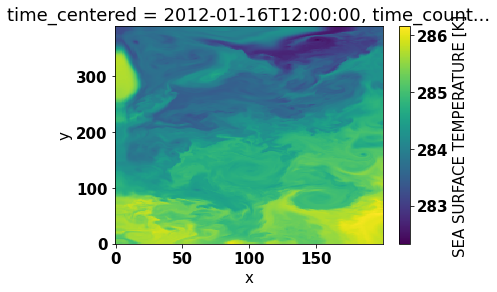

In [4]:
xday=15
af = varf.SST[xday][:,0:200]
at = vart.SST[xday][:,0:200]

af.plot()


# af = xr.DataArray(varf.SST[xday].data,dims=('ya','xa'),coords={'xa':(('xa','ya'),xrot),'ya':(('xa','ya'),yrot)})

# at = xr.DataArray(vart.SST[xday].data,dims=('ya','xa'),coords={'xa':(('xa','ya'),xrot),'ya':(('xa','ya'),yrot)})


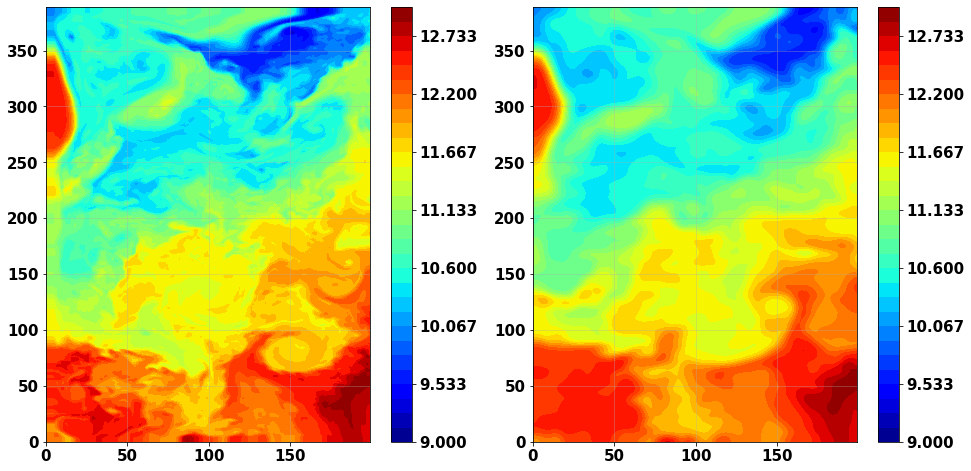

In [5]:

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.contourf(af.x,af.y,af-273.15,levels=np.linspace(9,13,31),cmap='jet')
plt.grid(alpha=0.4)
plt.colorbar()

plt.subplot(1,2,2)
plt.contourf(at.x,af.y,at-273.15,levels=np.linspace(9,13,31),cmap='jet')
plt.grid(alpha=0.4)
plt.colorbar()




In [80]:
af

<xarray.DataArray 'SST' (y: 390, x: 200)>
array([[285.25592, 285.25266, 285.25   , ..., 285.8281 , 285.80542, 285.78802],
       [285.25598, 285.25586, 285.25253, ..., 285.8281 , 285.80542, 285.78802],
       [285.25607, 285.25595, 285.25577, ..., 285.82806, 285.80542, 285.78802],
       ...,
       [283.1992 , 283.19937, 283.19986, ..., 283.4643 , 283.478  , 283.4856 ],
       [283.19937, 283.1999 , 283.1999 , ..., 283.4643 , 283.478  , 283.4856 ],
       [283.1999 , 283.1999 , 283.1999 , ..., 283.4643 , 283.478  , 283.4856 ]],
      dtype=float32)
Coordinates:
    nav_lat        (y, x) float32 32.44 32.45 32.46 32.47 ... 40.31 40.32 40.32
    nav_lon        (y, x) float32 -124.7 -124.7 -124.7 ... -125.2 -125.2 -125.2
    time_centered  datetime64[ns] 2012-01-16T12:00:00
    time_counter   datetime64[ns] 2012-01-16T12:00:00
    xk             (y, x) float64 -1.384e+07 -1.384e+07 ... -1.343e+07
    yk             (y, x) float64 3.601e+06 3.601e+06 ... 4.27e+06 4.27e+06
Dimensions without coordinates: y, x
Attributes:
    long_name:           SEA SURFACE TEMPERATURE
    units:               K
    online_operation:    average
    interval_operation:  12 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 12 s)

In [8]:


full_ps = xrft.power_spectrum(af.drop(['nav_lat','nav_lon']),dim=["x","y"])
smth_ps = xrft.power_spectrum(at.drop(['nav_lat','nav_lon']),dim=["x","y"])


iso_f = xrft.isotropic_powerspectrum(af.drop(['nav_lat','nav_lon']), dim=['x','y'],detrend='linear')
iso_t = xrft.isotropic_powerspectrum(at.drop(['nav_lat','nav_lon']), dim=['x','y'],detrend='linear')


# fy=smth_ps.freq_y
# fx=smth_ps.freq_x

# fx,fy=np.meshgrid(fx,fy)

/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:1063: Warning: This function has been renamed and will disappear in the future. Please use isotropic_power_spectrum instead
  warnings.warn(msg, Warning)
/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:1041: FutureWarning: The flag `truncate` will be set to True by default in future version in order to truncate the isotropic wavenumber larger than the Nyquist wavenumber.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:1063: Warning: This function has been renamed and will disappear in the future. Please use isotropic_power_spectrum instead
  warnings.warn(msg, Warning)
/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:1041: FutureWarning: The flag `truncate` will be set to True by default in future version in order to truncate the isotropic wavenumber larger than the Nyquist wavenumber.
  warnings.warn(msg, FutureWarning)


In [20]:
ls

fft_KE_rot.ipynb   first_try/                              second_try_figs/
fft_SST.ipynb      model_output_fft_angle.ipynb            xrft example.ipynb
fft_SST_rot.ipynb  model_output_fft_interp-filament.ipynb
figures/           model_output_fft_interp.ipynb


Text(0.5, 0, '$\\lambda [m]$')

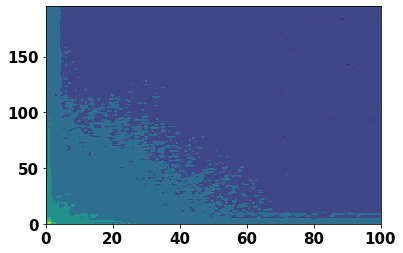

<Figure size 432x288 with 0 Axes>

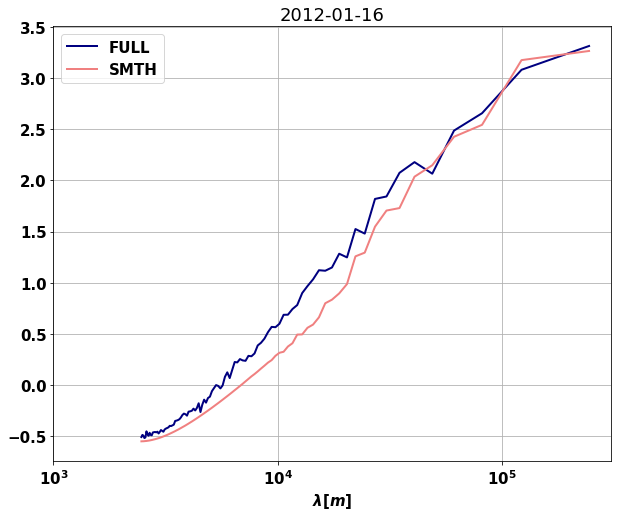

In [18]:
plt.contourf(np.log(full_ps[int(full_ps.shape[0]/2)-1:,int(full_ps.shape[1]/2)-1:]))
# full_ps.shape


plt.figure()
aa=np.nansum(full_ps[int(full_ps.shape[0]/2)-1:,int(full_ps.shape[1]/2):],axis=0)
ak=full_ps.freq_x[int(full_ps.shape[1]/2):]/(0.011*111e3)
bb=np.nansum(smth_ps[int(full_ps.shape[0]/2)-1:,int(smth_ps.shape[1]/2):],axis=0)
bk=smth_ps.freq_x[int(smth_ps.shape[1]/2):]/(0.011*111e3)



plt.figure(figsize=(10,8))


plt.plot(np.log10(1/ak),np.log10(aa),label='FULL',linewidth=2,color='navy')

plt.plot(np.log10(1/bk),np.log10(bb),label='SMTH',linewidth=2,color='lightcoral')
plt.legend()

plt.grid()


plt.xticks(np.array([3,4,5]),[r'10$^3$',r'10$^4$',r'10$^5$'])
plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'$\lambda [m]$')


Text(0.5, 1.0, '2012-01-16')

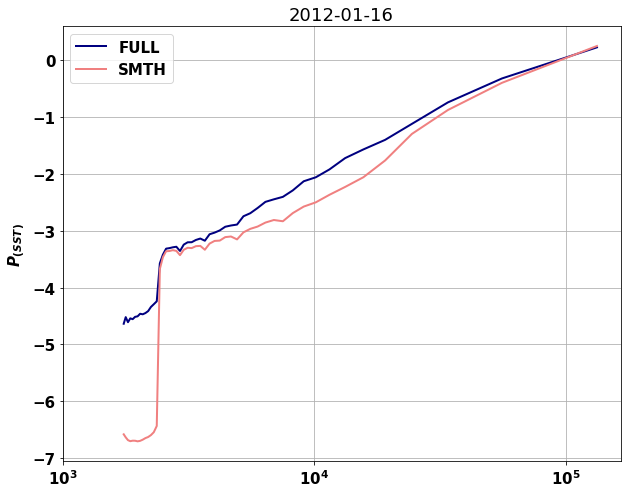

In [21]:

# plt.figure(figsize=(23,6))
# plt.subplot(1,3,1)
# plt.contourf(fx,fy,np.log(full_ps),levels=np.linspace(0,24,51),cmap='rainbow')
# plt.colorbar()
# plt.title('FULL')

# plt.subplot(1,3,2)
# plt.contourf(fx,fy,np.log(smth_ps),levels=np.linspace(0,24,51),cmap='rainbow')
# plt.colorbar()
# plt.title('SMTH')

# plt.subplot(1,3,3)
# plt.contourf(fx,fy,full_ps-smth_ps,levels=np.linspace(-1000,1000,51),cmap='seismic')
# plt.colorbar()
# plt.title('FULL - SMTH')



# plt.figure(figsize=(10,8))
# plt.plot(np.log10(2*np.pi/iso_f.freq_r),np.log10(iso_f),label='FULL',linewidth=2,color='navy')
# plt.plot(np.log10(2*np.pi/iso_f.freq_r),np.log10(iso_t),label='SMTH',linewidth=2,color='lightcoral')
# plt.ylabel(r'$P_{(SST)}$')
# # plt.xlabel(r'$\lambda$ [km]')
# plt.legend()
# plt.grid()
# # plt.xlim(0,10)


plt.figure(figsize=(10,8))
plt.plot(np.log10(1/iso_f.freq_r*(0.011*111e3)),np.log10(iso_f),label='FULL',linewidth=2,color='navy')
plt.plot(np.log10(1/iso_f.freq_r*(0.011*111e3)),np.log10(iso_t),label='SMTH',linewidth=2,color='lightcoral')
plt.ylabel(r'$P_{(SST)}$')
plt.xticks(np.array([3,4,5]),[r'10$^3$',r'10$^4$',r'10$^5$'])
# plt.xlabel(r'$\lambda$ [km]')
plt.legend()
plt.grid()
plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
# plt.xlabel(r'$\lambda [m]$')
# plt.xticks(np.arange(3,6,1),[r'10$^3$',r'10$^4$',r'10$^5$'])
# plt.xlim(0,10)

# plt.figure()
# plt.plot(iso_f-iso_t)

# plt.figure(figsize=(10,8))
# plt.plot(1/iso_f.freq_r,iso_f,norm='logNorm()',label='FULL',linewidth=2,color='navy')
# plt.plot(np.log(1/iso_f.freq_r),np.log(iso_t),label='SMTH',linewidth=2,color='lightcoral')
# plt.ylabel(r'$P_{(SST)}$')
# # plt.xlabel(r'$\lambda$ [km]')
# plt.legend()
# plt.grid()
# plt.ylim(3,5)





